In [1]:
import numpy as np
import matplotlib.pyplot as plt

### 넘파이 기초연산

In [2]:
a = np.array([1, 2]) # x1, x2
b = np.array([3, 4]) # w1, w2

In [3]:
c= a+b
c

array([4, 6])

In [4]:
d=np.array([[1,2],
           [4,5]])

In [5]:
d.ndim # 2차원 행렬 -> 행렬, 데이터 프레임

2

In [6]:
d + a # 브로드캐스팅

array([[2, 4],
       [5, 7]])

In [7]:
d+5

array([[ 6,  7],
       [ 9, 10]])

In [8]:
d+a

array([[2, 4],
       [5, 7]])

In [9]:
e=np.array([[1,2],
           [4,5],
           [7,8]])
e+a

array([[ 2,  4],
       [ 5,  7],
       [ 8, 10]])

In [10]:
a*e # x1, x2 를 w1, w2 시리즈 3개로 곱한 결과 -> 엣지 3개

array([[ 1,  4],
       [ 4, 10],
       [ 7, 16]])

In [11]:
a, e.T

(array([1, 2]),
 array([[1, 4, 7],
        [2, 5, 8]]))

In [12]:
### 행렬 연산 - 내적
np.dot(a, e.T) #dot=행렬곱

array([ 5, 14, 23])

In [13]:
# 최종 출력값은? x1*w1+x2*w2 + bias
result = np.dot(a, e.T) + np.array([3, 1, 2])
result

array([ 8, 15, 25])

### 활성화 함수
- 비선형 문제를 해결하기 위한 함수

### 계단함수
- x가 0 보다 작으면 0
- x가 0 보다 크면 1을 출력

In [14]:
x = np.array([1,2,-4,0])

In [15]:
y = np.array([1,1,1,1])
yhat = np.array([1,1,0,1])

In [16]:
def step_function(x):
    return np.where(x >=0, 1, 0)

In [17]:
step_function(x)

array([1, 1, 0, 1])

In [18]:
## 계단함수 시각화 해보기
x = np.linspace(-10, 10, 400)
y_step = step_function(x)

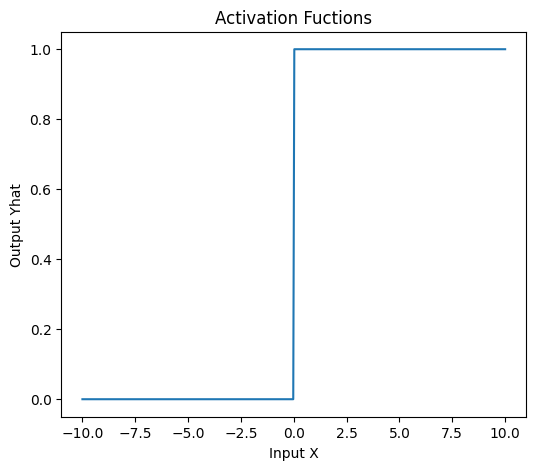

In [19]:
plt.figure(figsize=(6,5))
plt.title("Activation Fuctions")
plt.plot(x, y_step)
plt.xlabel('Input X')
plt.ylabel("Output Yhat")
plt.show()

### 시그모이드함수

$\frac{1}{1+e^{-x}}$

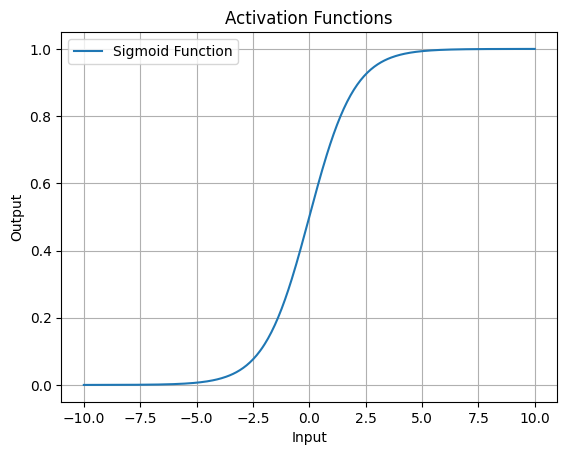

In [20]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

y_sigmoid = sigmoid(x)

# 시각화
plt.plot(x, y_sigmoid, label='Sigmoid Function')
plt.title("Activation Functions")
plt.xlabel("Input")
plt.ylabel("Output")
plt.grid(True)
plt.legend()
plt.show()

### 렐루함수

In [21]:
def relu(x):
    return np.maximum(0, x)

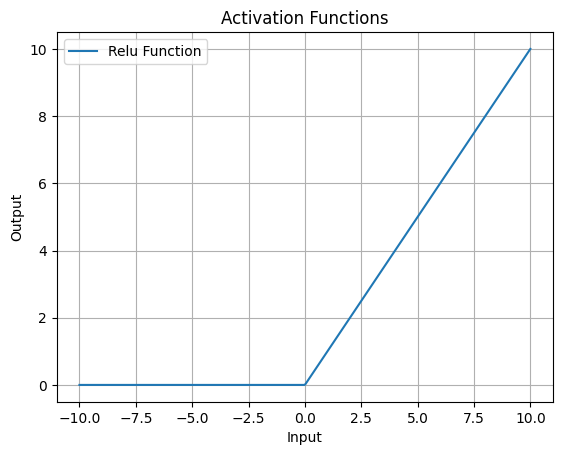

In [22]:
y_relu = relu(x)

# 시각화
plt.plot(x, y_relu, label='Relu Function')
plt.title("Activation Functions")
plt.xlabel("Input")
plt.ylabel("Output")
plt.grid(True)
plt.legend()
plt.show()

### 손실함수
- mse : 회귀
- 교차엔트로피 : 분류

In [23]:
# MSE 손실 함수
def mse_loss(y_true, y_pred):
    return np.mean((y_true - y_pred)**2)

In [24]:
# 교차 엔트로피 함수
def cross_entropy_loss(y_true, y_pred):
    epsilon = 1e-15
    y_pred = np.clip(y_pred, epsilon, 1-epsilon)
    y_pred = -np.sum(y_true * np.log(y_pred))
    return y_pred

In [25]:
y_true = np.array([1, 0, 1])
y_pred = np.array([0.5, 1, 0.2])

In [26]:
cross_entropy_loss(y_true, y_pred)

2.3025850929940455

In [27]:
y = np.array([0, 0, 0, 0, 0, 1, 0, 0, 0, 0]) # x 값 하나
y_pred = np.array([0.01, 0.1, 0.05, 0.0, 0.1, 0.7, 0.0, 0.03, 0.01, 0.0])

In [28]:
cross_entropy_loss(y, y_pred)

0.35667494393873245

In [29]:
y_pred = np.array([0.01, 0.1, 0.05, 0.0, 0.1, 0.03, 0.0, 0.7, 0.01, 0.0])
cross_entropy_loss(y, y_pred)

3.506557897319982